<a href="https://colab.research.google.com/github/taha-shafique/mmai894/blob/Hamid2/Crack_Detection_0318_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

**Download ZIP files and unzip into Colab environment**

In [1]:
# Download training/validation data file (40000 concrete images with and without cracks)
!wget https://www.josephambrose.com/concrete_data.zip

--2021-04-02 03:54:27--  https://www.josephambrose.com/concrete_data.zip
Resolving www.josephambrose.com (www.josephambrose.com)... 64.37.52.52
Connecting to www.josephambrose.com (www.josephambrose.com)|64.37.52.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243982265 (233M) [application/zip]
Saving to: ‘concrete_data.zip’

concrete_data.zip   100%[===================>] 232.68M   875KB/s    in 5m 2s   

2021-04-02 03:59:29 (790 KB/s) - ‘concrete_data.zip’ saved [243982265/243982265]



In [2]:
# Download testing data file (56000 images of pavements, decks, and walls with and without cracks)
!wget https://www.josephambrose.com/SDNET.zip

--2021-04-02 03:59:29--  https://www.josephambrose.com/SDNET.zip
Resolving www.josephambrose.com (www.josephambrose.com)... 64.37.52.52
Connecting to www.josephambrose.com (www.josephambrose.com)|64.37.52.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528256823 (504M) [application/zip]
Saving to: ‘SDNET.zip’

SDNET.zip           100%[===================>] 503.78M   662KB/s    in 10m 57s 

2021-04-02 04:10:27 (786 KB/s) - ‘SDNET.zip’ saved [528256823/528256823]



In [3]:
import os
!unzip -q concrete_data.zip
!unzip -q SDNET.zip
print(os.listdir())

['.config', 'SDNET', 'SDNET.zip', 'concrete_data.zip', 'concrete_data', 'sample_data']


##Data Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

negative_images = sorted(os.listdir('concrete_data/negative'))[0:]
print("Negative images (n =",len(negative_images), "):", negative_images[:10])

positive_images = sorted(os.listdir('concrete_data/positive'))[0:]
print("Positive images (n =",len(positive_images), "):", positive_images[:10])

print('Each image has the following shape: ',end='')
np.array(Image.open(f'concrete_data/positive/{positive_images[10]}')).shape

**Images with Crack**

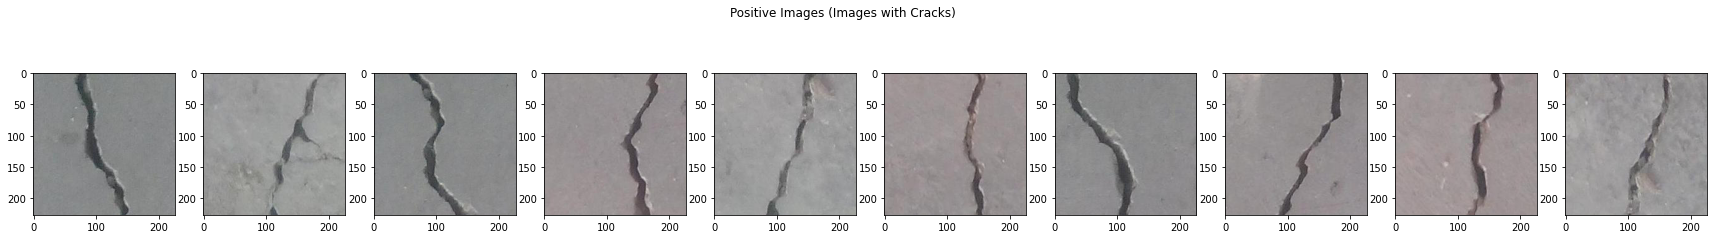

In [5]:
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = 0
for current_position in position:
    image_data = Image.open(f'concrete_data/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('Positive Images (Images with Cracks)') 
plt.show()

**Images without Crack**

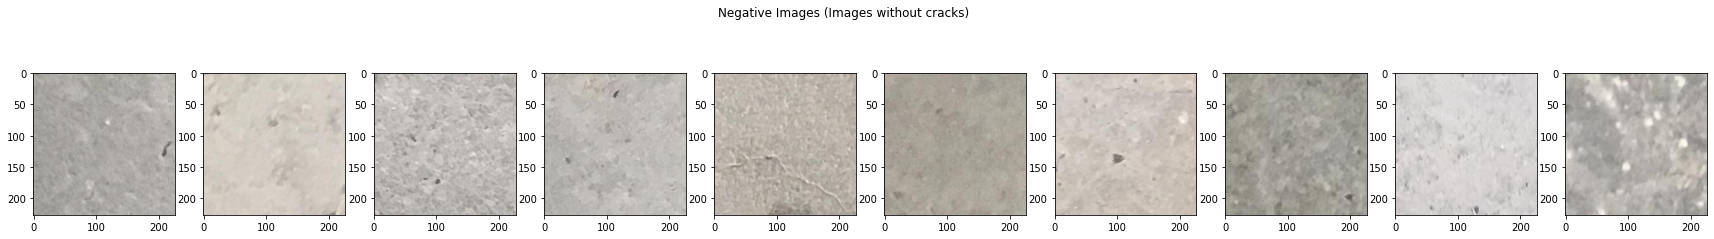

In [6]:
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = 0
for current_position in position:
    image_data = Image.open(f'concrete_data/negative/{negative_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('Negative Images (Images without cracks)') 
plt.show()


**Creating training and validation folders with image files**




In [7]:
import shutil
def create_folder(folder_name):
    if os.path.exists(folder_name):
       shutil.rmtree(folder_name)
    os.makedirs(folder_name)

# create training and validation folders
create_folder("training/negative")
create_folder("training/positive")
create_folder("validation/negative")
create_folder("validation/positive")

# obtain root directory
root_directory = os.getcwd()
#print(os.listdir(root_directory))

# defining four folders
training_negative = root_directory + "/training/negative/"
training_positive = root_directory + "/training/positive/"
validation_negative = root_directory + "/validation/negative/"
validation_positive = root_directory + "/validation/positive/"

# randomly allocate 80% of images into training set, and 20% into validation set
# copy images into appropriate folders
import random
random.seed(2021)
for f in positive_images:
    if random.random() > 0.80:
        shutil.copy(f'concrete_data/positive/{f}', validation_positive)
    else:
        shutil.copy(f'concrete_data/positive/{f}', training_positive)

for f in negative_images:
    if random.random() > 0.80:
        shutil.copy(f'concrete_data/negative/{f}', validation_negative)
    else:
        shutil.copy(f'concrete_data/negative/{f}', training_negative)

**Loading training and validation sets with images (from reading files)**

---



In [8]:
num_classes = 2
image_resize = 227 
training_batch_size = 100
validation_batch_size = 100

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

def create_data_generator_set(folder, batch_size):
    data_generator_set = data_generator.flow_from_directory(folder, target_size=(image_resize, image_resize), batch_size=batch_size, class_mode='categorical')
    return data_generator_set

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)
print("Validation set:")
validation_data = create_data_generator_set(root_directory+'/validation', validation_batch_size)

Training set:
Found 31998 images belonging to 2 classes.
Validation set:
Found 8002 images belonging to 2 classes.


**Creating 3 testing sets (Decks, Pavements, Walls)**

In [ ]:
testing_batch_size = 100
print("Testing sets:")
test_data_Decks = create_data_generator_set(root_directory+'/SDNET/Decks', testing_batch_size)
test_data_Pavements = create_data_generator_set(root_directory+'/SDNET/Pavements', testing_batch_size)
test_data_Walls = create_data_generator_set(root_directory+'/SDNET/Walls', testing_batch_size)

## Visualization of SDNET images##

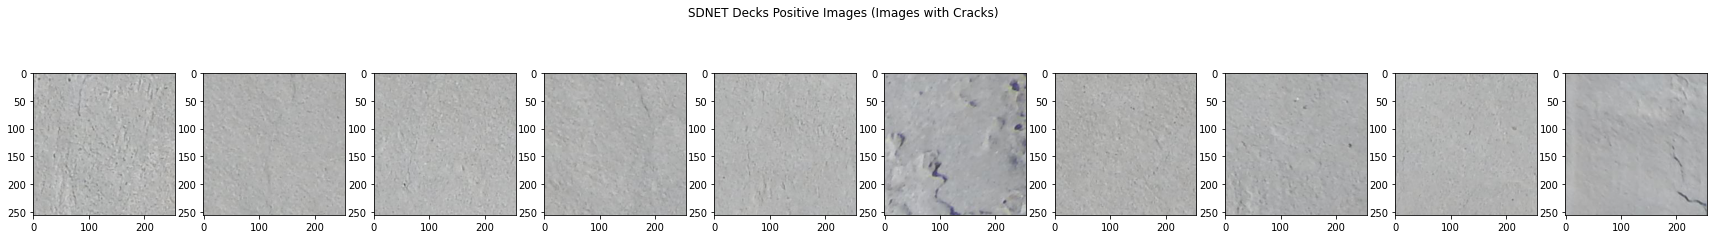

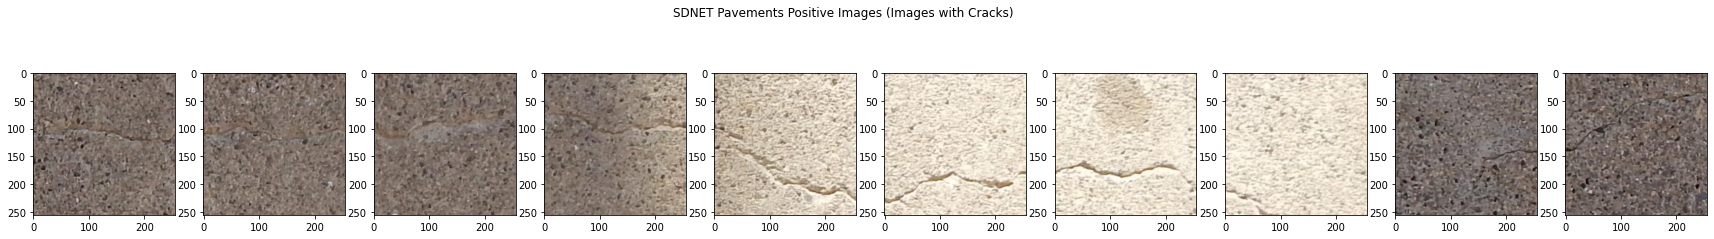

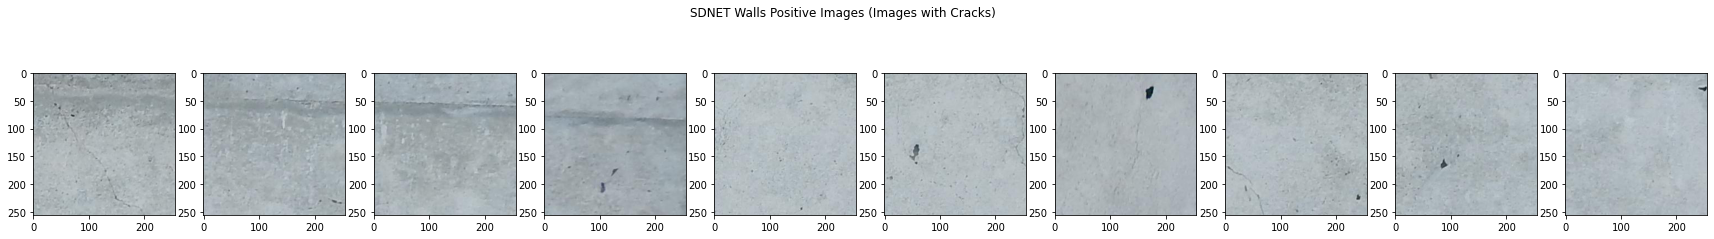

In [10]:
positive_images = sorted(os.listdir('SDNET/Decks/positive'))[0:]
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = 0
for current_position in position:
    image_data = Image.open(f'SDNET/Decks/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('SDNET Decks Positive Images (Images with Cracks)') 
plt.show()

positive_images = sorted(os.listdir('SDNET/Pavements/positive'))[0:]
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = 0
for current_position in position:
    image_data = Image.open(f'SDNET/Pavements/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('SDNET Pavements Positive Images (Images with Cracks)') 
plt.show()

positive_images = sorted(os.listdir('SDNET/Walls/positive'))[0:]
figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = 0
for current_position in position:
    image_data = Image.open(f'SDNET/Walls/positive/{positive_images[index]}')
    current_position.imshow(image_data)
    index = index + 1
figure.suptitle('SDNET Walls Positive Images (Images with Cracks)') 
plt.show()

## CNN model ##

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_resize,image_resize,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())
cnn1.add(Dense(32, activation='relu'))
cnn1.add(Dense(num_classes, activation='softmax'))
cnn1.summary()

cnn1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

num_epochs = 10
cnn1_fit_history = cnn1.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

## VGG16 pre-trained model ##

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = Sequential()
vgg16.add(VGG16(include_top=False, pooling='max', weights='imagenet'))
vgg16.add(Dense(10,activation='relu'))
vgg16.add(Dense(num_classes, activation='softmax'))
vgg16.layers[0].trainable = False
vgg16.summary()

vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
vgg16_fit_history = vgg16.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

## ResNet50 pre-trained model ##

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Input
resnet = Sequential()
resnet.add(ResNet50(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
resnet.add(Dense(10,activation='relu'))
resnet.add(Dense(num_classes, activation='softmax'))
resnet.layers[0].trainable = False
resnet.summary()

resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
resnet_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

## DenseNet model ##

In [ ]:
from keras.applications import DenseNet201
from keras.layers import Input

densenet = Sequential()
densenet.add(DenseNet201(include_top=False, pooling='max', weights='imagenet', input_tensor=Input(shape=(image_resize, image_resize, 3))))
densenet.add(Dense(10,activation='relu'))
densenet.add(Dense(num_classes, activation='softmax'))
densenet.layers[0].trainable = False
densenet.summary()

densenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 5
densenet_fit_history = densenet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)

##YoLo Model

In [ ]:
# import the necesasry packages: 

import cv2
import matplotlib.pyplot as plt
!pip install utils
from utils import *
from darknet import Darknet

In [ ]:
#YOLO V3: 

# create a YOLOv3 Keras model and save it to file
# based on https://github.com/experiencor/keras-yolo3
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model

def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x

def make_yolov3_model():
	input_image = Input(shape=(None, None, 3))
	# Layer  0 => 4
	x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
								  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
								  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
								  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
	# Layer  5 => 8
	x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
						{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
	# Layer  9 => 11
	x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
	# Layer 12 => 15
	x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
						{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
						{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
	# Layer 16 => 36
	for i in range(7):
		x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
							{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
	skip_36 = x
	# Layer 37 => 40
	x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
	# Layer 41 => 61
	for i in range(7):
		x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
							{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
	skip_61 = x
	# Layer 62 => 65
	x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
	# Layer 66 => 74
	for i in range(3):
		x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
							{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
	# Layer 75 => 79
	x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
	# Layer 80 => 82
	yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
							  {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
	# Layer 83 => 86
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_61])
	# Layer 87 => 91
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
	# Layer 92 => 94
	yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
							  {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
	# Layer 95 => 98
	x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_36])
	# Layer 99 => 106
	yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
							   {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
	model = Model(input_image, [yolo_82, yolo_94, yolo_106])
	return model

class WeightReader:
	def __init__(self, weight_file):
		with open(weight_file, 'rb') as w_f:
			major,	= struct.unpack('i', w_f.read(4))
			minor,	= struct.unpack('i', w_f.read(4))
			revision, = struct.unpack('i', w_f.read(4))
			if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
				w_f.read(8)
			else:
				w_f.read(4)
			transpose = (major > 1000) or (minor > 1000)
			binary = w_f.read()
		self.offset = 0
		self.all_weights = np.frombuffer(binary, dtype='float32')

	def read_bytes(self, size):
		self.offset = self.offset + size
		return self.all_weights[self.offset-size:self.offset]

	def load_weights(self, model):
		for i in range(106):
			try:
				conv_layer = model.get_layer('conv_' + str(i))
				print("loading weights of convolution #" + str(i))
				if i not in [81, 93, 105]:
					norm_layer = model.get_layer('bnorm_' + str(i))
					size = np.prod(norm_layer.get_weights()[0].shape)
					beta  = self.read_bytes(size) # bias
					gamma = self.read_bytes(size) # scale
					mean  = self.read_bytes(size) # mean
					var   = self.read_bytes(size) # variance
					weights = norm_layer.set_weights([gamma, beta, mean, var])
				if len(conv_layer.get_weights()) > 1:
					bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel, bias])
				else:
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel])
			except ValueError:
				print("no convolution #" + str(i))

	def reset(self):
		self.offset = 0

# define the model
model = make_yolov3_model()
# load the model weights
weight_reader = WeightReader('yolov3.weights')
# set the model weights into the model
weight_reader.load_weights(model)
# save the model to file
model.save('model.h5')

## Testing all models using SDNET data ##

**Create model testing function that produces confusion matrix and performance metrics**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import numpy
def model_testing(model, dataset):
    predictions = model.predict(dataset)
    predicted_classes = numpy.argmax(predictions, axis=1)
    true_classes = dataset.classes
    labels_for_classes = list(dataset.class_indices.keys())  
    matrix = confusion_matrix(true_classes, predicted_classes)
    report = classification_report(true_classes, predicted_classes, target_names=labels_for_classes) 
    return matrix, report

def model_testing_three_datasets(model):
    print(list(test_data_Decks.class_indices.keys()))
    matrix, report = model_testing(model, test_data_Decks)
    print("Decks:\n", matrix, "\n", report)
    matrix, report = model_testing(model, test_data_Pavements)
    print("Pavements:\n", matrix, "\n", report)
    matrix, report = model_testing(model, test_data_Walls)
    print("Walls:\n", matrix, "\n", report)

**Testing CNN model performance**

In [ ]:
model_testing_three_datasets(cnn1)

**Testing VGG16 model performance**



In [ ]:
model_testing_three_datasets(vgg16)

**Testing ResNet50 model performance**

In [ ]:
model_testing_three_datasets(resnet)

# Data Augmentation

In [ ]:
import PIL,cv2, scipy
def augment_image(image_data, augmentation_type):
    if augmentation_type == 1: # rotation 90 degree
       image_data = image_data.rotate(90)
    if augmentation_type == 2: # horizonal flip
       image_data = image_data.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    if augmentation_type == 3: # vertical flip
       image_data = image_data.transpose(PIL.Image.FLIP_TOP_BOTTOM)
    #if augmentation_type == 4: # shear_range 
    #if augmentation_type == 5: # zoom_range 
    return image_data

def add_augmented_images(augmentation_type):
    negative_images = sorted(os.listdir('training/negative'))[0:]
    positive_images = sorted(os.listdir('training/positive'))[0:]
    for f in negative_images:
        if f[0:1] != "A":
           image_data = Image.open(f'training/negative/{f}')
           # augmentation
           image_data = augment_image(image_data, augmentation_type)
           image_data.save(f'training/negative/A{f}')
    for f in positive_images:
        if f[0:1] != "A":
           image_data = Image.open(f'training/positive/{f}')
           # augmentation
           image_data = augment_image(image_data, augmentation_type)
           image_data.save(f'training/positive/A{f}')



## 90 degree Rotation##

In [ ]:
add_augmented_images(1) # rotation 90 degree

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)

**Visualizing the augmented images**

In [ ]:
training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images') 
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 4)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images')
plt.show()

**Re-run CNN model using augmented images and test its performance**

In [ ]:
cnn1_augmented1_fit_history = cnn1.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(cnn1)


**Re-run VGG16 model using augmented images and test its performance**

In [ ]:
vgg16_augmented1_fit_history = vgg16.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(vgg16)

**Re-run ResNet50 model using augmented images (90 degree rotation) and test its performance**

In [ ]:

resnet_augmented_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(resnet)


**Re-run RNN model using augmented images and test its performance**

## Horizontal Flip Augmentation ##

In [ ]:

add_augmented_images(2) # horizonal flip

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)


Visualizing the Augmented Images: 

In [ ]:

training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images', fontsize=25) 
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images', fontsize=25) 
plt.show()


Rerun CNN with horizontal flip data augmentation

In [ ]:

cnn3_augmented_fit_history = cnn3.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(cnn3)


Rerun Resnet50 with flip data augmentation

In [ ]:

resnet_augmented_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(resnet)



Vertical Flip data augmentation

In [ ]:

add_augmented_images(3) # vertical flip

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)


Visualization of data augmentation

In [ ]:

training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images', fontsize=25)  
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images', fontsize=25) 
plt.show()



Rerun models with vertical augmentation

In [ ]:

#CNN: 
cnn3_augmented_fit_history = cnn3.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(cnn3)


In [ ]:

resnet_augmented_fit_history = resnet.fit(train_data, steps_per_epoch=len(train_data), epochs=num_epochs,
    validation_data=validation_data, validation_steps=len(validation_data), verbose=1)
model_testing_three_datasets(resnet)



## Vertical flip augmentation 

In [ ]:

add_augmented_images(3) # vertical flip

print("Training set:")
train_data = create_data_generator_set(root_directory+'/training', training_batch_size)


In [ ]:

training_images = sorted(os.listdir('training/positive'))[0:]

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = 0
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Original Images', fontsize=25)  
plt.show()

figure, position = plt.subplots(nrows=1, ncols=10, figsize=(30, 3)) 
index = int(len(training_images)/2)
for current_position in position:
    current_position.imshow(Image.open(f'training/positive/{training_images[index]}'))
    index = index + 1
figure.suptitle('Augmented Images', fontsize=25) 
plt.show()

